# Data Set Up

The purpose of this notebook is to explore obtained dataset, check data sufficiency and split data into train set, test set, and validation set for model fitting. The data is obtained through Kaggle competition.

## Kaggle Competition! Melanoma Classification

Data resources: 

First data is from the Kaggle competition "SIIM-ISIC Melanoma Classification Identify" melanoma in lesion images. This data obtains about 33,126 images of both benign and malignant.

https://www.kaggle.com/c/siim-isic-melanoma-classification/data

Following is the cite of the dataset under CC BY-NC 4.0:


<div style="width:800px;height:280px;border:2px solid #001;"> 

    The ISIC 2020 Challenge Dataset https://doi.org/10.34970/2020-ds01 (c) by ISDIS, 2020
    
    Creative Commons Attribution-Non Commercial 4.0 International License.

    The dataset was generated by the International Skin Imaging Collaboration (ISIC) and images are from the following sources: Hospital Clínic de Barcelona, Medical University of Vienna, Memorial Sloan Kettering Cancer Center, Melanoma Institute Australia, The University of Queensland, and the University of Athens Medical School.

    You should have received a copy of the license along with this work.

    If not, see https://creativecommons.org/licenses/by-nc/4.0/legalcode.txt.
</div>

Due to class imbalance between benign and malignant (nearly at 1:99 ratio), more data was obtained in previous year's competitions, "2019 ISIC Melanoma Competition", and abstracting only malignant samples.

https://www.kaggle.com/cdeotte/jpeg-isic2019-512x512

## Importing Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

The goal is not to recreate/copy jpeg images into new directory which will result in large data space. In order to keep the data as raw as possible, a pathway to each image will be simply added to the dataframe.

In [2]:
raw_train_dir='../data/raw/jpeg/train/'
final_test_dir = '../data/raw/jpeg/test/'

#loading the training and test set
final_test=pd.read_csv('../data/raw/test.csv')

In [3]:
raw_train_df = pd.read_csv("../data/raw/train.csv")
raw_train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


To read the data on raw set, simply add file path to the dataframe.

In [4]:
raw_train_df['path'] = raw_train_dir + raw_train_df.image_name + ".jpg"
final_test['path'] = final_test_dir + final_test.image_name + ".jpg"
raw_train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/raw/jpeg/train/ISIC_2637011.jpg
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/raw/jpeg/train/ISIC_0015719.jpg
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/raw/jpeg/train/ISIC_0052212.jpg
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/raw/jpeg/train/ISIC_0068279.jpg
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/raw/jpeg/train/ISIC_0074268.jpg


In [5]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 9 columns):
image_name                       33126 non-null object
patient_id                       33126 non-null object
sex                              33061 non-null object
age_approx                       33058 non-null float64
anatom_site_general_challenge    32599 non-null object
diagnosis                        33126 non-null object
benign_malignant                 33126 non-null object
target                           33126 non-null int64
path                             33126 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB


## Data Cleaning

In [6]:
raw_train_df.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
path                               0
dtype: int64

Anatom site, sex, and age values can be left blank since our goal for this project is to have the machine perform the image recognition.

In [7]:
raw_train_df.target.value_counts(normalize=True)

0    0.98237
1    0.01763
Name: target, dtype: float64

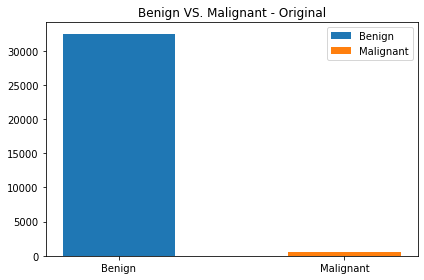

In [8]:
x = ['Benign', 'Malignant']
ben_x = x[0]
mal_x = x[1]
y = raw_train_df.target.value_counts()
ben_y = y[0]
mal_y = y[1]
width = .5

fig, ax = plt.subplots()

benign_bar = ax.bar(ben_x, ben_y, width=width, label=ben_x)
malig_bar = ax.bar(mal_x, mal_y, width=width, label=mal_x)

ax.set_title('Benign VS. Malignant - Original')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()
plt.savefig("../reports/figures/Original Data Distribution")
plt.show()

We can see that the train set is heavily imbalanced. To mitigate the imbalanced set, more data is obtained from previous year's Kaggle competition. From the set, I extracted only malignant samples to bring up the sample balance.

In [9]:
additional_mal_dir= '../data/raw/archive/train/'
additional_mal_df= pd.read_csv("../data/raw/archive/train.csv")
additional_mal_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767


In [10]:
additional_mal_df['path'] = additional_mal_dir + additional_mal_df.image_name + ".jpg"
additional_mal_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,path
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767,../data/raw/archive/train/ISIC_0000000.jpg
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767,../data/raw/archive/train/ISIC_0000001.jpg
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767,../data/raw/archive/train/ISIC_0000002.jpg
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767,../data/raw/archive/train/ISIC_0000003.jpg
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767,../data/raw/archive/train/ISIC_0000004.jpg


To combine data with existing data frame, we will need to drop some columns.

In [11]:
raw_train_df.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target', 'path'],
      dtype='object')

In [12]:
additional_mal_df.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target', 'tfrecord', 'width', 'height', 'path'],
      dtype='object')

In [13]:
additional_mal_df=additional_mal_df.drop(columns=['tfrecord', 'width', 'height'])
additional_mal_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,../data/raw/archive/train/ISIC_0000000.jpg
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,../data/raw/archive/train/ISIC_0000001.jpg
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,../data/raw/archive/train/ISIC_0000002.jpg
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,../data/raw/archive/train/ISIC_0000003.jpg
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,../data/raw/archive/train/ISIC_0000004.jpg


In [14]:
additional_mal_df = additional_mal_df[additional_mal_df.target==1]
additional_mal_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,../data/raw/archive/train/ISIC_0000002.jpg
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,../data/raw/archive/train/ISIC_0000004.jpg
12,ISIC_0000013,-1,female,30.0,posterior torso,MEL,malignant,1,../data/raw/archive/train/ISIC_0000013.jpg
21,ISIC_0000022_downsampled,-1,female,55.0,lower extremity,MEL,malignant,1,../data/raw/archive/train/ISIC_0000022_downsam...
25,ISIC_0000026_downsampled,-1,female,30.0,lower extremity,MEL,malignant,1,../data/raw/archive/train/ISIC_0000026_downsam...


In [15]:
len(additional_mal_df)

4522

We can add about 4522 malignant images to the dataset and it will bring a better machine learning.

In [16]:
comb_df = pd.concat([additional_mal_df,raw_train_df])
comb_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,../data/raw/archive/train/ISIC_0000002.jpg
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,../data/raw/archive/train/ISIC_0000004.jpg
12,ISIC_0000013,-1,female,30.0,posterior torso,MEL,malignant,1,../data/raw/archive/train/ISIC_0000013.jpg
21,ISIC_0000022_downsampled,-1,female,55.0,lower extremity,MEL,malignant,1,../data/raw/archive/train/ISIC_0000022_downsam...
25,ISIC_0000026_downsampled,-1,female,30.0,lower extremity,MEL,malignant,1,../data/raw/archive/train/ISIC_0000026_downsam...


In [17]:
comb_df.target.value_counts(normalize=True)

0    0.864375
1    0.135625
Name: target, dtype: float64

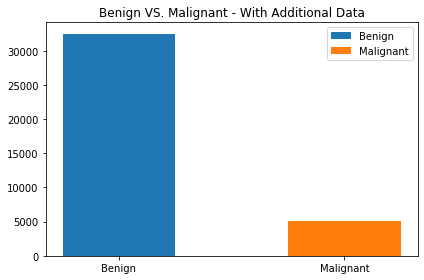

In [18]:
x = ['Benign', 'Malignant']
ben_x = x[0]
mal_x = x[1]
y = comb_df.target.value_counts()
ben_y = y[0]
mal_y = y[1]
width = .5

fig, ax = plt.subplots()

benign_bar = ax.bar(ben_x, ben_y, width=width, label=ben_x)
malig_bar = ax.bar(mal_x, mal_y, width=width, label=mal_x)

ax.set_title('Benign VS. Malignant - With Additional Data')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()
plt.savefig("../reports/figures/Additional Malig Data Distribution")
plt.show()

We were able to bring class imbalance from 1.7% to 13% in ratio!

## Data Split

In [19]:
comb_df.target.value_counts()

0    32542
1     5106
Name: target, dtype: int64

In [20]:
raw_X = comb_df.drop("target", axis=1)
raw_y = comb_df.target

Splitting the validation set for the final model check.

In [21]:
train_X, val_X, train_y, val_y = train_test_split(raw_X, raw_y, test_size=.1,random_state=42)

Splitting train and test set for model training.

In [22]:
train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=.2, random_state=42)

Further data observation

In [23]:
train_df = pd.concat([train_X, train_y], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27106 entries, 12594 to 10273
Data columns (total 9 columns):
image_name                       27106 non-null object
patient_id                       27106 non-null object
sex                              27063 non-null object
age_approx                       27002 non-null float64
anatom_site_general_challenge    26630 non-null object
diagnosis                        27106 non-null object
benign_malignant                 27106 non-null object
path                             27106 non-null object
target                           27106 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 2.1+ MB


In [24]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,path,target
12594,ISIC_3879233,IP_3564160,female,65.0,upper extremity,unknown,benign,../data/raw/jpeg/train/ISIC_3879233.jpg,0
5755,ISIC_1828419,IP_1522453,female,25.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_1828419.jpg,0
3467,ISIC_1150399,IP_4879325,female,55.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_1150399.jpg,0
11154,ISIC_3435115,IP_3448782,male,50.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_3435115.jpg,0
14746,ISIC_4516835,IP_5474292,male,40.0,lower extremity,unknown,benign,../data/raw/jpeg/train/ISIC_4516835.jpg,0


In [25]:
train_df.target.value_counts(normalize=True)

0    0.864495
1    0.135505
Name: target, dtype: float64

In [26]:
test_df = pd.concat([test_X, test_y], axis=1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6777 entries, 11493 to 12760
Data columns (total 9 columns):
image_name                       6777 non-null object
patient_id                       6777 non-null object
sex                              6764 non-null object
age_approx                       6745 non-null float64
anatom_site_general_challenge    6667 non-null object
diagnosis                        6777 non-null object
benign_malignant                 6777 non-null object
path                             6777 non-null object
target                           6777 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 529.5+ KB


In [27]:
test_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,path,target
11493,ISIC_3541663,IP_1091619,male,40.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_3541663.jpg,0
20808,ISIC_0066116,-1,male,65.0,anterior torso,MEL,malignant,../data/raw/archive/train/ISIC_0066116.jpg,1
14594,ISIC_4472903,IP_5945814,female,35.0,lower extremity,unknown,benign,../data/raw/jpeg/train/ISIC_4472903.jpg,0
21209,ISIC_6436590,IP_9164079,female,40.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_6436590.jpg,0
26217,ISIC_7959322,IP_0843629,male,35.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_7959322.jpg,0


In [28]:
test_df.target.value_counts(normalize=True)

0    0.86528
1    0.13472
Name: target, dtype: float64

In [29]:
val_df = pd.concat([val_X, val_y], axis=1)
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3765 entries, 5688 to 21515
Data columns (total 9 columns):
image_name                       3765 non-null object
patient_id                       3765 non-null object
sex                              3756 non-null object
age_approx                       3748 non-null float64
anatom_site_general_challenge    3697 non-null object
diagnosis                        3765 non-null object
benign_malignant                 3765 non-null object
path                             3765 non-null object
target                           3765 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 294.1+ KB


In [30]:
val_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,path,target
5688,ISIC_1802797,IP_2913292,male,50.0,lower extremity,unknown,benign,../data/raw/jpeg/train/ISIC_1802797.jpg,0
19374,ISIC_5883084,IP_2152204,female,50.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_5883084.jpg,0
24189,ISIC_7343496,IP_4584109,female,60.0,lower extremity,seborrheic keratosis,benign,../data/raw/jpeg/train/ISIC_7343496.jpg,0
5752,ISIC_0027155,-1,male,65.0,head/neck,MEL,malignant,../data/raw/archive/train/ISIC_0027155.jpg,1
27667,ISIC_8374701,IP_6318212,female,55.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_8374701.jpg,0


In [31]:
val_df.target.value_counts(normalize=True)

0    0.861886
1    0.138114
Name: target, dtype: float64

In [32]:
final_test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,path
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../data/raw/jpeg/test/ISIC_0052060.jpg
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../data/raw/jpeg/test/ISIC_0052349.jpg
2,ISIC_0058510,IP_7960270,female,55.0,torso,../data/raw/jpeg/test/ISIC_0058510.jpg
3,ISIC_0073313,IP_6375035,female,50.0,torso,../data/raw/jpeg/test/ISIC_0073313.jpg
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../data/raw/jpeg/test/ISIC_0073502.jpg


All data has been well distributed and data will be exported. 

## Data Export

In [33]:
train_df.to_csv('../data/interim/train.csv')

In [34]:
test_df.to_csv('../data/interim/test.csv')

In [35]:
val_df.to_csv('../data/interim/val.csv')

In [36]:
final_test.to_csv('../data/interim/final_test.csv')

## Conclusion

The original data set obtained for year 2020 Kaggle competition had a huge class imbalance with ratio of 1:99. After obtaining additional images from previous year competition, class imbalance has improved to 13:87. After combining all data, it was split into train, test, validation in ratio of 72:18:10.